In [1]:
# !pip install pandas catboost xgboost scikit-learn

In [2]:
import collections

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [4]:
training_data = pd.read_csv("train.txt")
test_data = pd.read_csv("test.txt")

In [5]:
X_train = training_data.iloc[:, 1:-1].values
y_train = training_data.iloc[:, -1].values

X_test = test_data.iloc[:, 1:-1].values
y_test = test_data.iloc[:, -1].values

In [6]:
def mode(num_list):
    data = collections.Counter(num_list)
    data_list = dict(data)

    max_value = max(list(data.values()))
    mode_val = [num for num, freq in data_list.items() if freq == max_value]
    if len(mode_val) == len(num_list):
        return None
    
    return ", ".join(map(str, mode_val))

C:\Users\vibha\AppData\Local\Temp\ipykernel_29964\1825412202.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train==j,0], X_train[y_train==j,1], c = ListedColormap(['#DF4E4E', '#7CAE00', '#C77CFF', '#00BFC4'])(i), label = j)


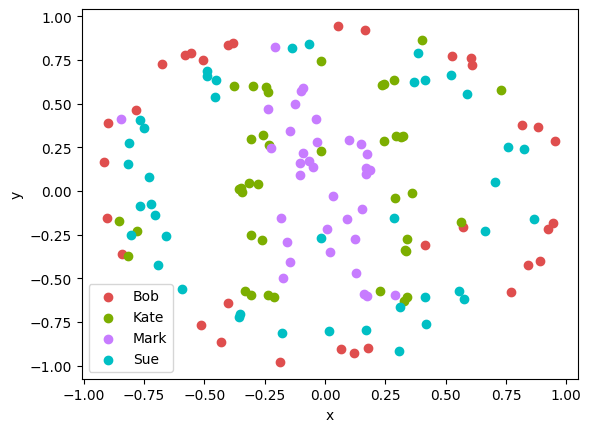

In [7]:
# Training Set plot
from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train==j,0], X_train[y_train==j,1], c = ListedColormap(['#DF4E4E', '#7CAE00', '#C77CFF', '#00BFC4'])(i), label = j)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

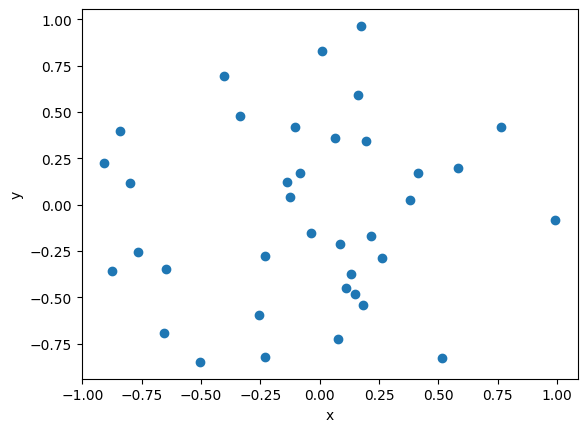

In [8]:
plt.scatter(X_test[:,0], X_test[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnbPred = gnb.predict(X_test)

print("Gaussian Naive Bayes Accuracy: ", accuracy_score(y_test, gnbPred))


Gaussian Naive Bayes Accuracy:  0.6486486486486487


In [10]:
knnc = KNeighborsClassifier(n_neighbors=1, algorithm="auto", metric="minkowski", n_jobs=-1)
knnc.fit(X_train, y_train)
knnPred = knnc.predict(X_test)

print("KNN Accuracy: ", accuracy_score(y_test, knnPred))

KNN Accuracy:  0.7027027027027027


In [11]:
svcl = SVC(kernel="rbf")
svcl.fit(X_train, y_train)
svcPred = svcl.predict(X_test)

print("SVC Accuracy: ", accuracy_score(y_test, svcPred))

SVC Accuracy:  0.7027027027027027


In [12]:
rfcl = RandomForestClassifier(n_estimators=100, criterion="entropy")
rfcl.fit(X_train, y_train)
rfPred = rfcl.predict(X_test)

print("Random Forest Accuracy: ", accuracy_score(y_test, rfPred))

Random Forest Accuracy:  0.8108108108108109


In [13]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
logregPred = logr.predict(X_test)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, logregPred))

Logistic Regression Accuracy:  0.21621621621621623


In [14]:
from sklearn.preprocessing import LabelEncoder

xgbc = XGBClassifier()

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgbc.fit(X_train, y_train_encoded)
xgbPred = xgbc.predict(X_test)

print("XGBoost Accuracy: ", accuracy_score(y_test_encoded, xgbPred))

XGBoost Accuracy:  0.8108108108108109


In [15]:
cbc = CatBoostClassifier(iterations=100, learning_rate=0.5, depth=10, loss_function="MultiClass")
cbc.fit(X_train, y_train)
cbPred = cbc.predict(X_test)

print("CatBoost Accuracy: ", accuracy_score(y_test, cbPred))

0:	learn: 1.1121378	total: 160ms	remaining: 15.9s
1:	learn: 0.9522045	total: 179ms	remaining: 8.78s
2:	learn: 0.8686656	total: 197ms	remaining: 6.37s
3:	learn: 0.8052631	total: 198ms	remaining: 4.76s
4:	learn: 0.7472707	total: 217ms	remaining: 4.13s
5:	learn: 0.6908183	total: 235ms	remaining: 3.68s
6:	learn: 0.6378742	total: 253ms	remaining: 3.36s
7:	learn: 0.5967945	total: 270ms	remaining: 3.11s
8:	learn: 0.5687886	total: 288ms	remaining: 2.92s
9:	learn: 0.5284463	total: 306ms	remaining: 2.75s
10:	learn: 0.5012262	total: 324ms	remaining: 2.63s
11:	learn: 0.4735014	total: 343ms	remaining: 2.52s
12:	learn: 0.4556765	total: 363ms	remaining: 2.43s
13:	learn: 0.4382070	total: 381ms	remaining: 2.34s
14:	learn: 0.4089521	total: 400ms	remaining: 2.27s
15:	learn: 0.3902133	total: 420ms	remaining: 2.21s
16:	learn: 0.3711583	total: 439ms	remaining: 2.14s
17:	learn: 0.3523056	total: 458ms	remaining: 2.09s
18:	learn: 0.3355745	total: 477ms	remaining: 2.03s
19:	learn: 0.3194403	total: 496ms	remaini

Manual method for max voting

In [16]:
final_pred1 = np.array([])
final_pred2 = np.array([])
final_pred3 = np.array([])

for i, j in enumerate(y_test):
    final_pred1 = np.append(final_pred1, mode([knnPred[i], gnbPred[i], cbPred[i][0], xgbPred[i], svcPred[i], logregPred[i]]))
    final_pred2 = np.append(final_pred2, mode([knnPred[i], gnbPred[i], xgbPred[i], svcPred[i], logregPred[i]]))
    final_pred3 = np.append(final_pred3, mode([knnPred[i], rfPred[i], gnbPred[i], xgbPred[i], svcPred[i], logregPred[i]]))

In [17]:
print("accuracy_score : {:.2f} %".format(accuracy_score(y_test, final_pred1) * 100))
print("accuracy_score : {:.2f} %".format(accuracy_score(y_test, final_pred2) * 100))
print("accuracy_score : {:.2f} %".format(accuracy_score(y_test, final_pred3) * 100))

accuracy_score : 70.27 %
accuracy_score : 59.46 %
accuracy_score : 67.57 %


In [18]:
v_knnc = KNeighborsClassifier(n_neighbors=1, algorithm="auto", metric="minkowski")
v_svcl = SVC(kernel="rbf")
v_logr = LogisticRegression(solver="newton-cg")
v_xgbc = XGBClassifier()
v_gnb = GaussianNB()
v_rf = RandomForestClassifier(n_estimators=100, criterion="entropy")

In [19]:
model1 = VotingClassifier(
    estimators=[
        ("knn", v_knnc), 
        ("svc", v_svcl), 
        ("lr", v_logr), 
        ("xgb", v_xgbc)
        ],
    voting="hard",
)
model1.fit(X_train, y_train)
v_pred1 = model1.predict(X_test)

print("Voting Classifier Accuracy: ", accuracy_score(y_test, v_pred1))

Voting Classifier Accuracy:  0.8108108108108109


In [20]:
model2 = VotingClassifier(
    estimators=[
        ("knn", v_knnc),
        ("svc", v_svcl),
        ("gnb", v_gnb),
        ("lr", v_logr),
        ("xgb", v_xgbc),
    ],
    voting="hard",
)
model2.fit(X_train, y_train)

v_pred2 = model2.predict(X_test)

print("Voting Classifier Accuracy: ", accuracy_score(y_test, v_pred2))

Voting Classifier Accuracy:  0.7027027027027027


In [22]:
model3 = VotingClassifier(
    estimators=[
        ("gnb", v_rf),
        ("xgb", v_xgbc),
    ],
    voting="hard",
)
model3.fit(X_train, y_train)
v_pred3 = model3.predict(X_test)

print("Voting Classifier Accuracy: ", accuracy_score(y_test, v_pred3))

Voting Classifier Accuracy:  0.8378378378378378
